In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 更改当前路径
path = input("请输入文件所在文件夹：")
os.chdir(path)
print("当前路径为:{}".format(os.getcwd()))

当前路径为:/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230413尊悦IMU传感器与 Xsens MVN数据对比


In [33]:
# 新建plot 储存图片
plot_dir_name = "plot"
if not os.path.exists(plot_dir_name):
    os.mkdir(plot_dir_name)

print(os.listdir())

['20230413跺脚走6步路测试-XsensMVN.mp4', 'plot', '20230413跺脚走6步路测试-XsensMVN.xlsx']


In [3]:
# 读取 Xsens MVN 数据
Xsens_file = "20230413跺脚走6步路测试-XsensMVN.xlsx"

# 相较于 pd.readexcel(), 
# pd.ExcelFile()只读取Excel 元数据
# 当处理大批量数据时，更加的高效
# 此处如果读取全部数据，用时大约 1 分钟读取速度较慢
Xsens_excel_file =  pd.ExcelFile(Xsens_file)
Xsens_sheetnames = Xsens_excel_file.sheet_names
print(Xsens_sheetnames)

['General Information', 'Markers', 'Segment Orientation - Quat', 'Segment Orientation - Euler', 'Segment Position', 'Segment Velocity', 'Segment Acceleration', 'Segment Angular Velocity', 'Segment Angular Acceleration', 'Joint Angles ZXY', 'Joint Angles XZY', 'Ergonomic Joint Angles ZXY', 'Ergonomic Joint Angles XZY', 'Center of Mass', 'Sensor Free Acceleration', 'Sensor Magnetic Field', 'Sensor Orientation - Quat', 'Sensor Orientation - Euler']


In [4]:
# 读取数据
Xsens_df = pd.read_excel(Xsens_file, sheet_name="Sensor Free Acceleration")
# 查看基本信息
Xsens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              2423 non-null   int64  
 1   Pelvis x           2423 non-null   float64
 2   Pelvis y           2423 non-null   float64
 3   Pelvis z           2423 non-null   float64
 4   L5 x               2423 non-null   int64  
 5   L5 y               2423 non-null   int64  
 6   L5 z               2423 non-null   int64  
 7   L3 x               2423 non-null   int64  
 8   L3 y               2423 non-null   int64  
 9   L3 z               2423 non-null   int64  
 10  T12 x              2423 non-null   int64  
 11  T12 y              2423 non-null   int64  
 12  T12 z              2423 non-null   int64  
 13  T8 x               2423 non-null   int64  
 14  T8 y               2423 non-null   int64  
 15  T8 z               2423 non-null   int64  
 16  Neck x             2423 

In [5]:
# 查看所有列的名称
Xsens_df.columns

Index(['Frame', 'Pelvis x', 'Pelvis y', 'Pelvis z', 'L5 x', 'L5 y', 'L5 z',
       'L3 x', 'L3 y', 'L3 z', 'T12 x', 'T12 y', 'T12 z', 'T8 x', 'T8 y',
       'T8 z', 'Neck x', 'Neck y', 'Neck z', 'Head x', 'Head y', 'Head z',
       'Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z',
       'Right Upper Arm x', 'Right Upper Arm y', 'Right Upper Arm z',
       'Right Forearm x', 'Right Forearm y', 'Right Forearm z', 'Right Hand x',
       'Right Hand y', 'Right Hand z', 'Left Shoulder x', 'Left Shoulder y',
       'Left Shoulder z', 'Left Upper Arm x', 'Left Upper Arm y',
       'Left Upper Arm z', 'Left Forearm x', 'Left Forearm y',
       'Left Forearm z', 'Left Hand x', 'Left Hand y', 'Left Hand z',
       'Right Upper Leg x', 'Right Upper Leg y', 'Right Upper Leg z',
       'Right Lower Leg x', 'Right Lower Leg y', 'Right Lower Leg z',
       'Right Foot x', 'Right Foot y', 'Right Foot z', 'Right Toe x',
       'Right Toe y', 'Right Toe z', 'Left Upper Leg x', 'Left Upper Leg

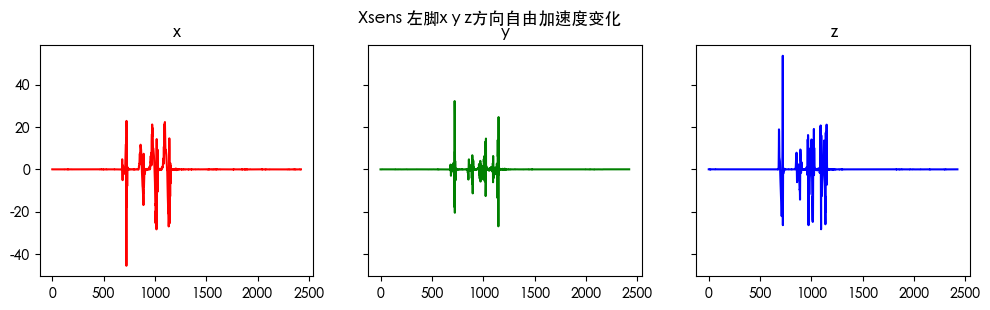

In [79]:
# 绘制图片
fig, axs = plt.subplots(1,3,figsize=(12,3),sharey=True)

# 设置第一幅图标题
axs[0].set_title("x")
Xsens_df["Left Foot x"].plot(ax=axs[0],color="r")

# 设置第二副图标题
axs[1].set_title("y")
Xsens_df["Left Foot y"].plot(ax=axs[1],color="g")

# 设置第三副图标题
axs[2].set_title("z")
Xsens_df["Left Foot z"].plot(ax=axs[2],color="b")

# 显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 设置总标题
plot_file_name = "Xsens 左脚x y z方向自由加速度变化"
plot_file_path = os.path.join(plot_dir_name,plot_file_name)
plt.suptitle(plot_file_name,y=1)
plt.savefig(plot_file_path)

In [40]:
# 尊悦小蓝块IMU数据分析
zy_file = "20230413跺脚走 6 步路测试-zyIMU.csv"
zy_df = pd.read_csv(zy_file)
print(zy_df.info)

<bound method DataFrame.info of       SensorId   TimeStamp (s)   FrameNumber   AccX (g)   AccY (g)   AccZ (g)  \
0            1         -0.0002             0  -0.142809  -0.495929  -0.852164   
1            2          0.0002             0   0.011392  -0.770265  -0.637309   
2            1          0.0098             1  -0.141649  -0.496640  -0.852689   
3            2          0.0102             1   0.011884  -0.770451  -0.636944   
4            1          0.0198             2  -0.141504  -0.495902  -0.853171   
...        ...             ...           ...        ...        ...        ...   
3920         1         25.8598          2202  -0.142825  -0.501741  -0.851928   
3921         1         25.8698          2203  -0.144403  -0.501746  -0.850464   
3922         1         25.8798          2204  -0.143398  -0.502241  -0.851412   
3923         1         25.8898          2205  -0.143669  -0.501986  -0.850102   
3924         1         25.8998          2206  -0.143947  -0.501383  -0.849945

In [60]:
#浏览数据
print(zy_df.info())
#查看前 3 行代码
zy_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SensorId             3925 non-null   int64  
 1    TimeStamp (s)       3925 non-null   float64
 2    FrameNumber         3925 non-null   int64  
 3    AccX (g)            3925 non-null   float64
 4    AccY (g)            3925 non-null   float64
 5    AccZ (g)            3925 non-null   float64
 6    GyroX (deg/s)       3925 non-null   float64
 7    GyroY (deg/s)       3925 non-null   float64
 8    GyroZ (deg/s)       3925 non-null   float64
 9    MagX (uT)           3925 non-null   float64
 10   MagY (uT)           3925 non-null   float64
 11   MagZ (uT)           3925 non-null   float64
 12   EulerX (deg)        3925 non-null   float64
 13   EulerY (deg)        3925 non-null   float64
 14   EulerZ (deg)        3925 non-null   float64
 15   QuatW               3925 non-null   f

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
0,1,-0.0002,0,-0.142809,-0.495929,-0.852164,0.050816,0.057225,-0.027230,14.352529,...,0.249328,-0.114206,-0.185008,0.000048,-0.002238,-0.003064,0.0,0.0,0.0,0.0
1,2,0.0002,0,0.011392,-0.770265,-0.637309,-0.070562,-0.023664,0.105633,43.203743,...,0.111493,0.320466,0.851261,0.000243,-0.000497,0.000171,0.0,0.0,0.0,0.0
2,1,0.0098,1,-0.141649,-0.496640,-0.852689,0.068635,0.039756,-0.117567,14.352529,...,0.249372,-0.114157,-0.185016,-0.001086,-0.001544,-0.002569,0.0,0.0,0.0,0.0


In [43]:
# 查看所有列的名称
zy_df.columns

Index(['SensorId', ' TimeStamp (s)', ' FrameNumber', ' AccX (g)', ' AccY (g)',
       ' AccZ (g)', ' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)',
       ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)', ' EulerX (deg)',
       ' EulerY (deg)', ' EulerZ (deg)', ' QuatW', ' QuatX', ' QuatY',
       ' QuatZ', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',
       ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',
       ' HeaveMotion (m)'],
      dtype='object')

In [61]:
# 筛选出左脚的传感器，编号为2
zy_df_filterd = zy_df[zy_df["SensorId"]==2]
zy_df_filterd.head(3)

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
1,2,0.0002,0,0.011392,-0.770265,-0.637309,-0.070562,-0.023664,0.105633,43.203743,...,0.111493,0.320466,0.851261,0.000243,-0.000497,0.000171,0.0,0.0,0.0,0.0
3,2,0.0102,1,0.011884,-0.770451,-0.636944,0.106428,-0.093535,-0.020026,43.876060,...,0.111502,0.320472,0.851256,-0.000237,-0.000191,-0.000232,0.0,0.0,0.0,0.0
5,2,0.0202,2,0.011308,-0.771215,-0.636856,-0.052704,-0.023489,0.052976,43.145279,...,0.111504,0.320466,0.851259,0.000321,0.000577,-0.000133,0.0,0.0,0.0,0.0


In [62]:
# 查看所有列的数据
zy_df_filterd.columns

Index(['SensorId', ' TimeStamp (s)', ' FrameNumber', ' AccX (g)', ' AccY (g)',
       ' AccZ (g)', ' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)',
       ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)', ' EulerX (deg)',
       ' EulerY (deg)', ' EulerZ (deg)', ' QuatW', ' QuatX', ' QuatY',
       ' QuatZ', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',
       ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',
       ' HeaveMotion (m)'],
      dtype='object')

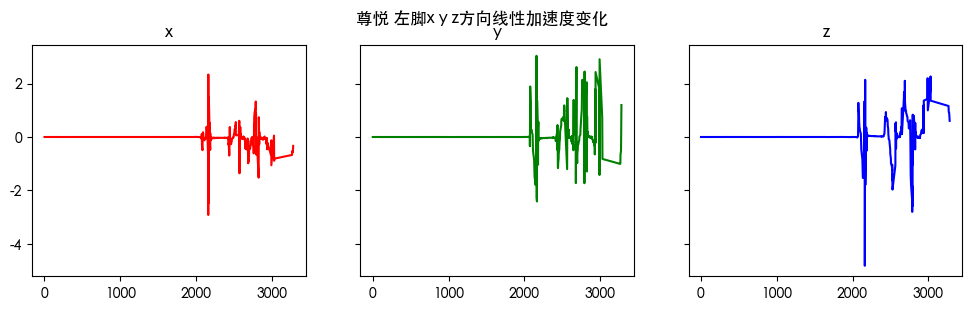

In [78]:
# 绘图
fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)

# 绘制第一幅图
axs[0].set_title("x")
zy_df_filterd[" LinAccX (g)"].plot(ax=axs[0],color="r")

# 绘制第二副子图
axs[1].set_title("y")
zy_df_filterd[" LinAccY (g)"].plot(ax=axs[1],color="g")

# 绘制第三副子图
axs[2].set_title("z")
zy_df_filterd[" LinAccZ (g)"].plot(ax=axs[2],color="b")

# 命名并保存
# 设置总标题
plot_file_name = "尊悦 左脚x y z方向线性加速度变化"
plot_file_path = os.path.join(plot_dir_name,plot_file_name)
plt.suptitle(plot_file_name,y=1)
plt.savefig(plot_file_path)